# This notebook contains the Stacks parameter tests, final scripts used and analyses to identify sex linked markers for the ddRADseq dataset of <i>Rana latastei</i> 
## Sample set:

### ?? locations 

34 samples:
- 15 females
- 18 males
- 1 unknown. . . . (shuould be able to solve that).

Don't know anything about populations yet, if I can't find this info then do PCA


##Contents of this notebook:

####1. Ustacks parameter tests using a subset of samples
####2. Cstacks parameter tests using a subset of samples
####3. Populations parameter tests (for separate families, using all samples in each family)
####4. Identification of sex-linked markers
####5. Map sex-linked markers to the genome(s). 


In [2]:
%matplotlib inline
import os
import Incremental_U as IncU 
import Incremental_C as IncC
import Incremental_Pop_mod as IncPop
import MISC_RAD_tools as MISC
import pprint
import subprocess
from Bio.Blast.Applications import NcbiblastnCommandline
import MISC_RAD_tools as MISC
import shutil

In [3]:
%load_ext rpy2.ipython

##1. Ustacks parameter tests

In [1]:
### Fastq files are here:
Incrememntal_test_directory = "/home/djeffrie/Data/RADseq/Pperezi/Incremental/Ustacks/"

In [2]:
## INPUT INCREMENTAL TEST PARAMETERS HERE -----------------------------------------

parameters = ["M", "m", "MS"]                   ## List, eg ["M", "m", "MS"]. If only testing 1 param, this must still be a list e.g. ["M"]
M_vals =   [2,3,4,5,6]                          ## List, eg range(1,5,1) this would give [1,2,3,4]
m_vals =   [2,3,4,5,6]                          ## List, eg range(1,5,1) this would give [1,2,3,4]
MS_vals =  [2,3,4]                              ## List, eg range(1,5,1) this would give [1,2,3,4]
threads =  7                                    ## Int. eg 7
parent_dir = Incrememntal_test_directory        ## Absolute Dir containing the demultiplexed raw read fasta/fastq files
run_cline_switch =  1                           ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs

print "Analsyses will be performed in %s" % parent_dir

## Making input dictionary --------------------------------------

Setup_dict = {}
Setup_dict["parameters"] = {}
Setup_dict["threads"] = threads
Setup_dict["parent_directory"] = parent_dir
Setup_dict["run_cline_switch"] = run_cline_switch
Setup_dict["verbose"] = False

for param in parameters:
    if "M" in param:
        Setup_dict["parameters"][param] = M_vals
    if "m" in param:
        Setup_dict["parameters"][param] = m_vals
    if "MS" in param:
        Setup_dict["parameters"][param] = MS_vals

#pp = pprint.PrettyPrinter(indent=2)
#pp.pprint(Setup_dict)


Analsyses will be performed in /home/djeffrie/Data/RADseq/Pperezi/Incremental/Ustacks/



##### ------- Test samples, parameters and values ------ #####

{ 'Pper_480_F.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                        'MS': { 2: { }, 3: { }, 4: { }},
                        'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Pper_482_M.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                        'MS': { 2: { }, 3: { }, 4: { }},
                        'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Pper_485_F.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                        'MS': { 2: { }, 3: { }, 4: { }},
                        'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Pper_486_F.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                        'MS': { 2: { }, 3: { }, 4: { }},
                        'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Pper_487_M.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                        'MS': { 2: { }, 3: { }, 4: { }}

/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


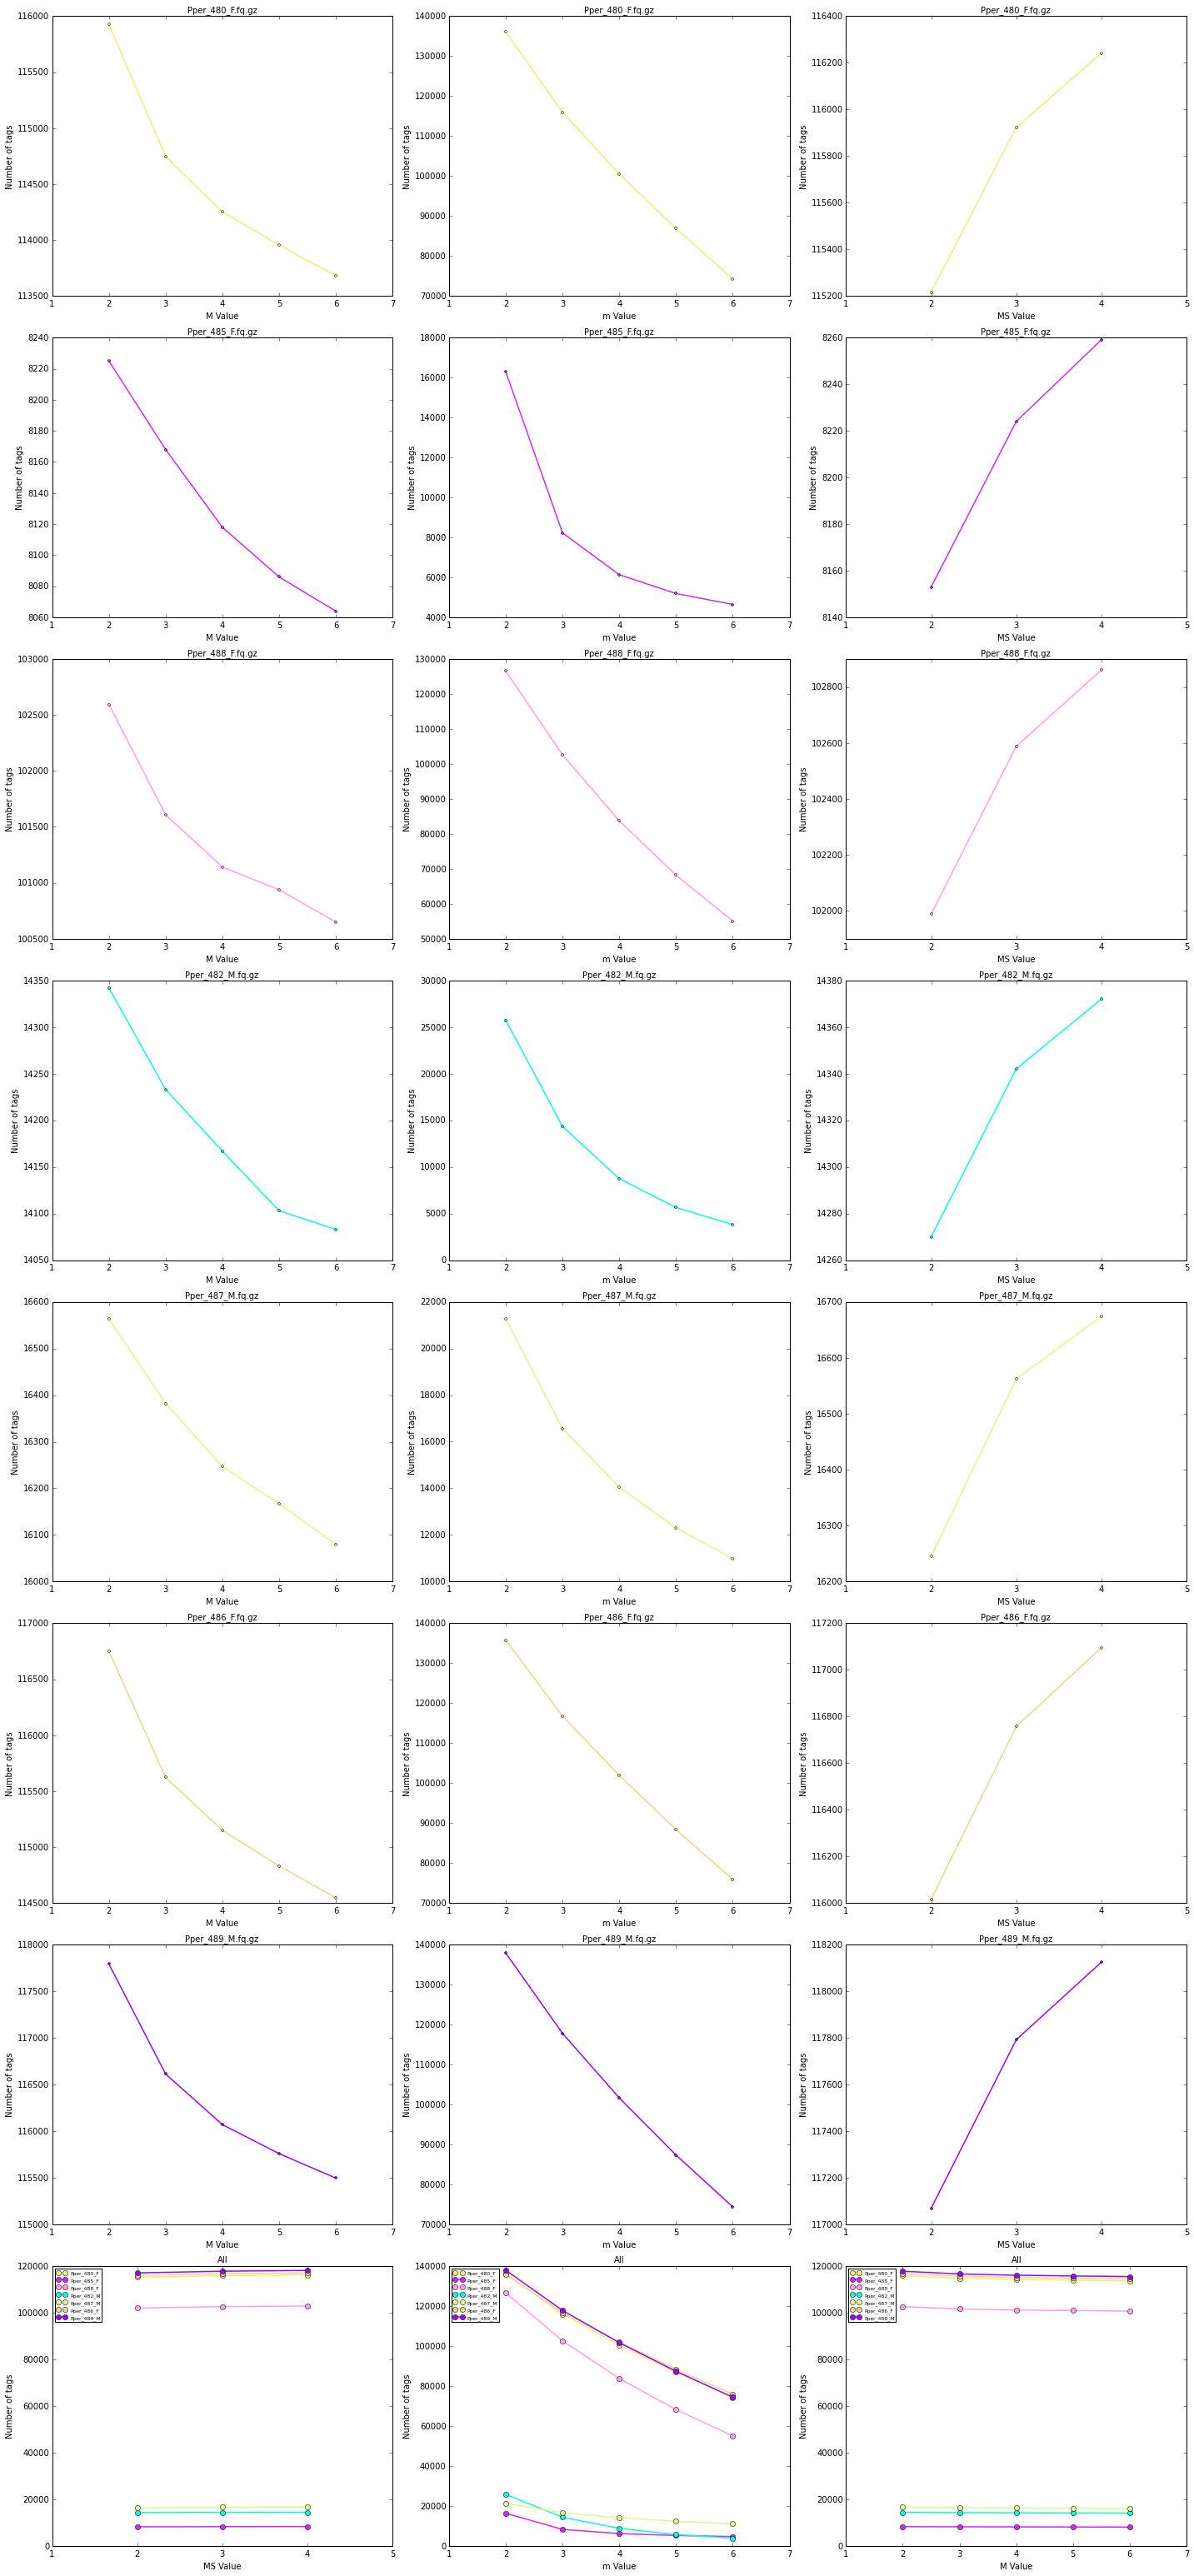

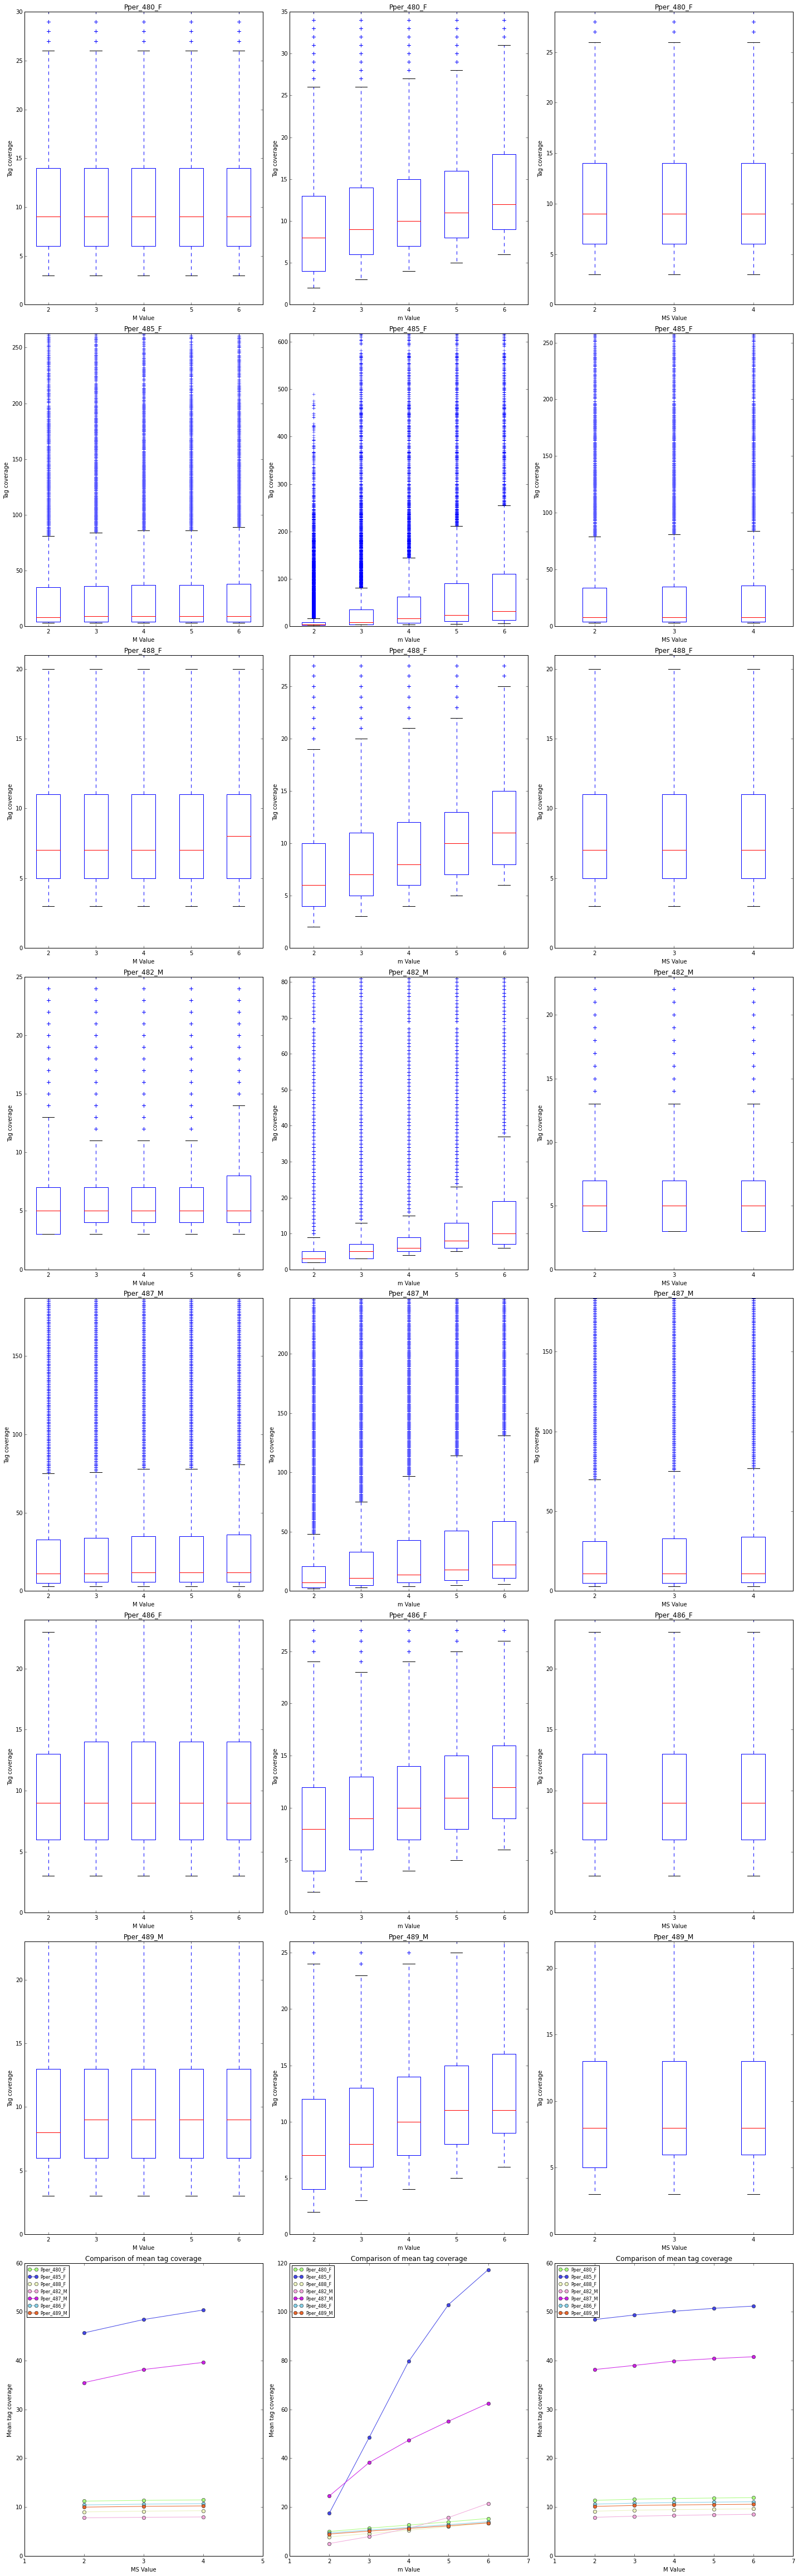

In [5]:
Incremental_U_outputs = IncU.IncreMental_U(Setup_dict)

<b>Final Ustacks commands</b> -------------------------------------------------------------------------------------------------------------------

ustacks -t gzfastq -f SAMPLE.fq.gz -i 1 -m 3 -M 2 -r -d;  



###2. Cstacks tests -------------------------------------------------------------------------------------------------------------------

In [6]:
## INPUT INCREMENTAL_C PARAMETERS HERE -----------------------------------------

## Get IDs for the test samples

Parameter_dict = {}
Parameter_dict["Get_IDs"] = True
Parameter_dict["Ustacks_outs_dir"] = "/home/djeffrie/Data/RADseq/Pperezi/Incremental/Cstacks/"

IncC.Incremental_C(Parameter_dict)


 ## Sample IDs:

Pper_480_F, ID = 1
Pper_482_M, ID = 4
Pper_485_F, ID = 2
Pper_486_F, ID = 6
Pper_487_M, ID = 5
Pper_488_F, ID = 3
Pper_489_M, ID = 7


In [7]:
## INPUT INCREMENTAL_C PARAMETERS HERE -----------------------------------------

Parameter_dict = {}
Parameter_dict["Get_IDs"] = False
Parameter_dict["batch_ID"] = 1
Parameter_dict["n_vals"] = [1,2,3,4]
Parameter_dict["threads"] = 7
Parameter_dict["Ustacks_outs_dir"] = "/home/djeffrie/Data/RADseq/Pperezi/Incremental/Cstacks/"
Parameter_dict["sample_ids"] = [2,6,4]   ## add specific sample ID's of samples you want to look at, if this is not all samples in the directory given above. Leave as empty list if not.
Parameter_dict["run_cline_switch"] = 1     ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs

pp = pprint.PrettyPrinter(indent=2)
pp.pprint(Parameter_dict)

{ 'Get_IDs': False,
  'Ustacks_outs_dir': '/home/djeffrie/Data/RADseq/Pperezi/Incremental/Cstacks/',
  'batch_ID': 1,
  'n_vals': [1, 2, 3, 4],
  'run_cline_switch': 1,
  'sample_ids': [2, 6, 4],
  'threads': 7}



### ----- Making and running command lines ----- ###

n value = 1
cstacks -b 1 -n 1 -s /home/djeffrie/Data/RADseq/Pperezi/Incremental/Cstacks//Pper_482_M -s /home/djeffrie/Data/RADseq/Pperezi/Incremental/Cstacks//Pper_485_F -s /home/djeffrie/Data/RADseq/Pperezi/Incremental/Cstacks//Pper_486_F 7 -o /home/djeffrie/Data/RADseq/Pperezi/Incremental/Cstacks//n_1
Running Command line

n value = 2
cstacks -b 1 -n 2 -s /home/djeffrie/Data/RADseq/Pperezi/Incremental/Cstacks//Pper_482_M -s /home/djeffrie/Data/RADseq/Pperezi/Incremental/Cstacks//Pper_485_F -s /home/djeffrie/Data/RADseq/Pperezi/Incremental/Cstacks//Pper_486_F 7 -o /home/djeffrie/Data/RADseq/Pperezi/Incremental/Cstacks//n_2
Running Command line

n value = 3
cstacks -b 1 -n 3 -s /home/djeffrie/Data/RADseq/Pperezi/Incremental/Cstacks//Pper_482_M -s /home/djeffrie/Data/RADseq/Pperezi/Incremental/Cstacks//Pper_485_F -s /home/djeffrie/Data/RADseq/Pperezi/Incremental/Cstacks//Pper_486_F 7 -o /home/djeffrie/Data/RADseq/Pperezi/Incremental

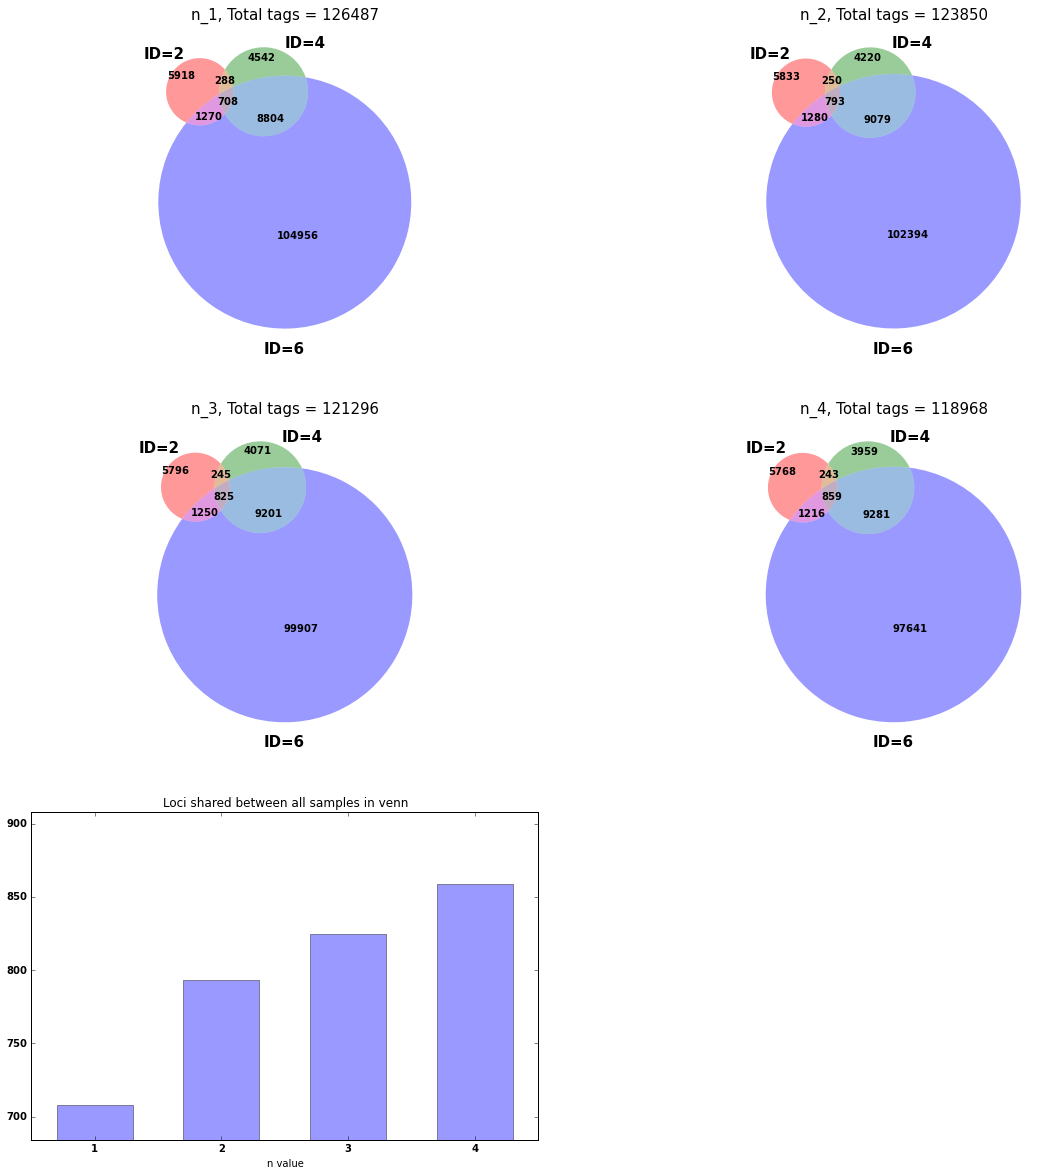

In [8]:
IncC.Incremental_C(Parameter_dict)  

## Note Rche_150 (ID = 6) is not good quality so I expect this sample to share fewer loci than the other two

There looks to be a big variation in the quality of samples in this dataset. So I will probably have to prune heavily. Relaxed populations run will show the extent of this.

<b>Final Cstacks command</b> ----------------------------------------------------------------------------------------------------------------------------

cstacks -b 1 -n2 -p 8  -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_156_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_248_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_256_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_30_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_334_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_351_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_363_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_387_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_445_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_475_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_479_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_480_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_482_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_485_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_486_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_487_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_488_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_489_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_490_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_491_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_492_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_493_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_494_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_495_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_496_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_497_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_498_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_499_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_500_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_501_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_502_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_503_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_504_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_505_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_506_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_507_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_508_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_510_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_511_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_530_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_55_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_88_M  -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_R30_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_R334_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_R485_F -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_R501_M -s /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks//Pper_R506_F -o /scratch/beegfs/monthly/djeffrie/RADseq_datasets/Pperezi/Stacks/

<b> Final Sstacks commands </b> -------------------------------------------------------------------------------------------------------------------------  

sstacks -b 1 -s Rche_146 -c batch_1
sstacks -b 1 -s Rche_147 -c batch_1
sstacks -b 1 -s Rche_148 -c batch_1
sstacks -b 1 -s Rche_149 -c batch_1
sstacks -b 1 -s Rche_150 -c batch_1
sstacks -b 1 -s Rche_152 -c batch_1
sstacks -b 1 -s Rche_155 -c batch_1
sstacks -b 1 -s Rche_156 -c batch_1
sstacks -b 1 -s Rche_157 -c batch_1
sstacks -b 1 -s Rche_158 -c batch_1
sstacks -b 1 -s Rche_159 -c batch_1
sstacks -b 1 -s Rche_160 -c batch_1
sstacks -b 1 -s Rche_163 -c batch_1
sstacks -b 1 -s Rche_164 -c batch_1
sstacks -b 1 -s Rche_165 -c batch_1
sstacks -b 1 -s Rche_166 -c batch_1
sstacks -b 1 -s Rche_167 -c batch_1
sstacks -b 1 -s Rche_168 -c batch_1
sstacks -b 1 -s Rche_178 -c batch_1
sstacks -b 1 -s Rche_179 -c batch_1
sstacks -b 1 -s Rche_180 -c batch_1
sstacks -b 1 -s Rche_182 -c batch_1
sstacks -b 1 -s Rche_186 -c batch_1
sstacks -b 1 -s Rche_187 -c batch_1
sstacks -b 1 -s Rche_188 -c batch_1
sstacks -b 1 -s Rche_190 -c batch_1
sstacks -b 1 -s Rche_194 -c batch_1
sstacks -b 1 -s Rche_195 -c batch_1
sstacks -b 1 -s Rche_196 -c batch_1
sstacks -b 1 -s Rche_197 -c batch_1
sstacks -b 1 -s Rche_198 -c batch_1
sstacks -b 1 -s Rche_202 -c batch_1
sstacks -b 1 -s Rche_203 -c batch_1
sstacks -b 1 -s Rche_204 -c batch_1
sstacks -b 1 -s Rche_205 -c batch_1
sstacks -b 1 -s Rche_206 -c batch_1
sstacks -b 1 -s Rche_210 -c batch_1
sstacks -b 1 -s Rche_211 -c batch_1
sstacks -b 1 -s Rche_212 -c batch_1
sstacks -b 1 -s Rche_213 -c batch_1
sstacks -b 1 -s Rche_214 -c batch_1
sstacks -b 1 -s Rche_218 -c batch_1
sstacks -b 1 -s Rche_219 -c batch_1
sstacks -b 1 -s Rche_220 -c batch_1
sstacks -b 1 -s Rche_221 -c batch_1
sstacks -b 1 -s Rche_329 -c batch_1

###3. Populations tests  -----------------------------------------------------------------------------------------------------------------

First, I am using relaxed sample filtering criteria (i.e. the constraints on number of samples a locus must be present in are loose). This will allow me to look at which samples are responsible for a lot of locus dropout. If some samples are particularly bad they can be removed and the dataset will likely be better off.

<b> relaxed populations command </b>

populations -b1 -M popmap.txt -P ./ -r 0.5 -p 1 --vcf -t 12 > Populations_relaxed.log 2>&1 & 

Running populations like this means that a locus has to be present in at least half the samples in at least 1 sex. We will have to be more strict with the final dataset. 

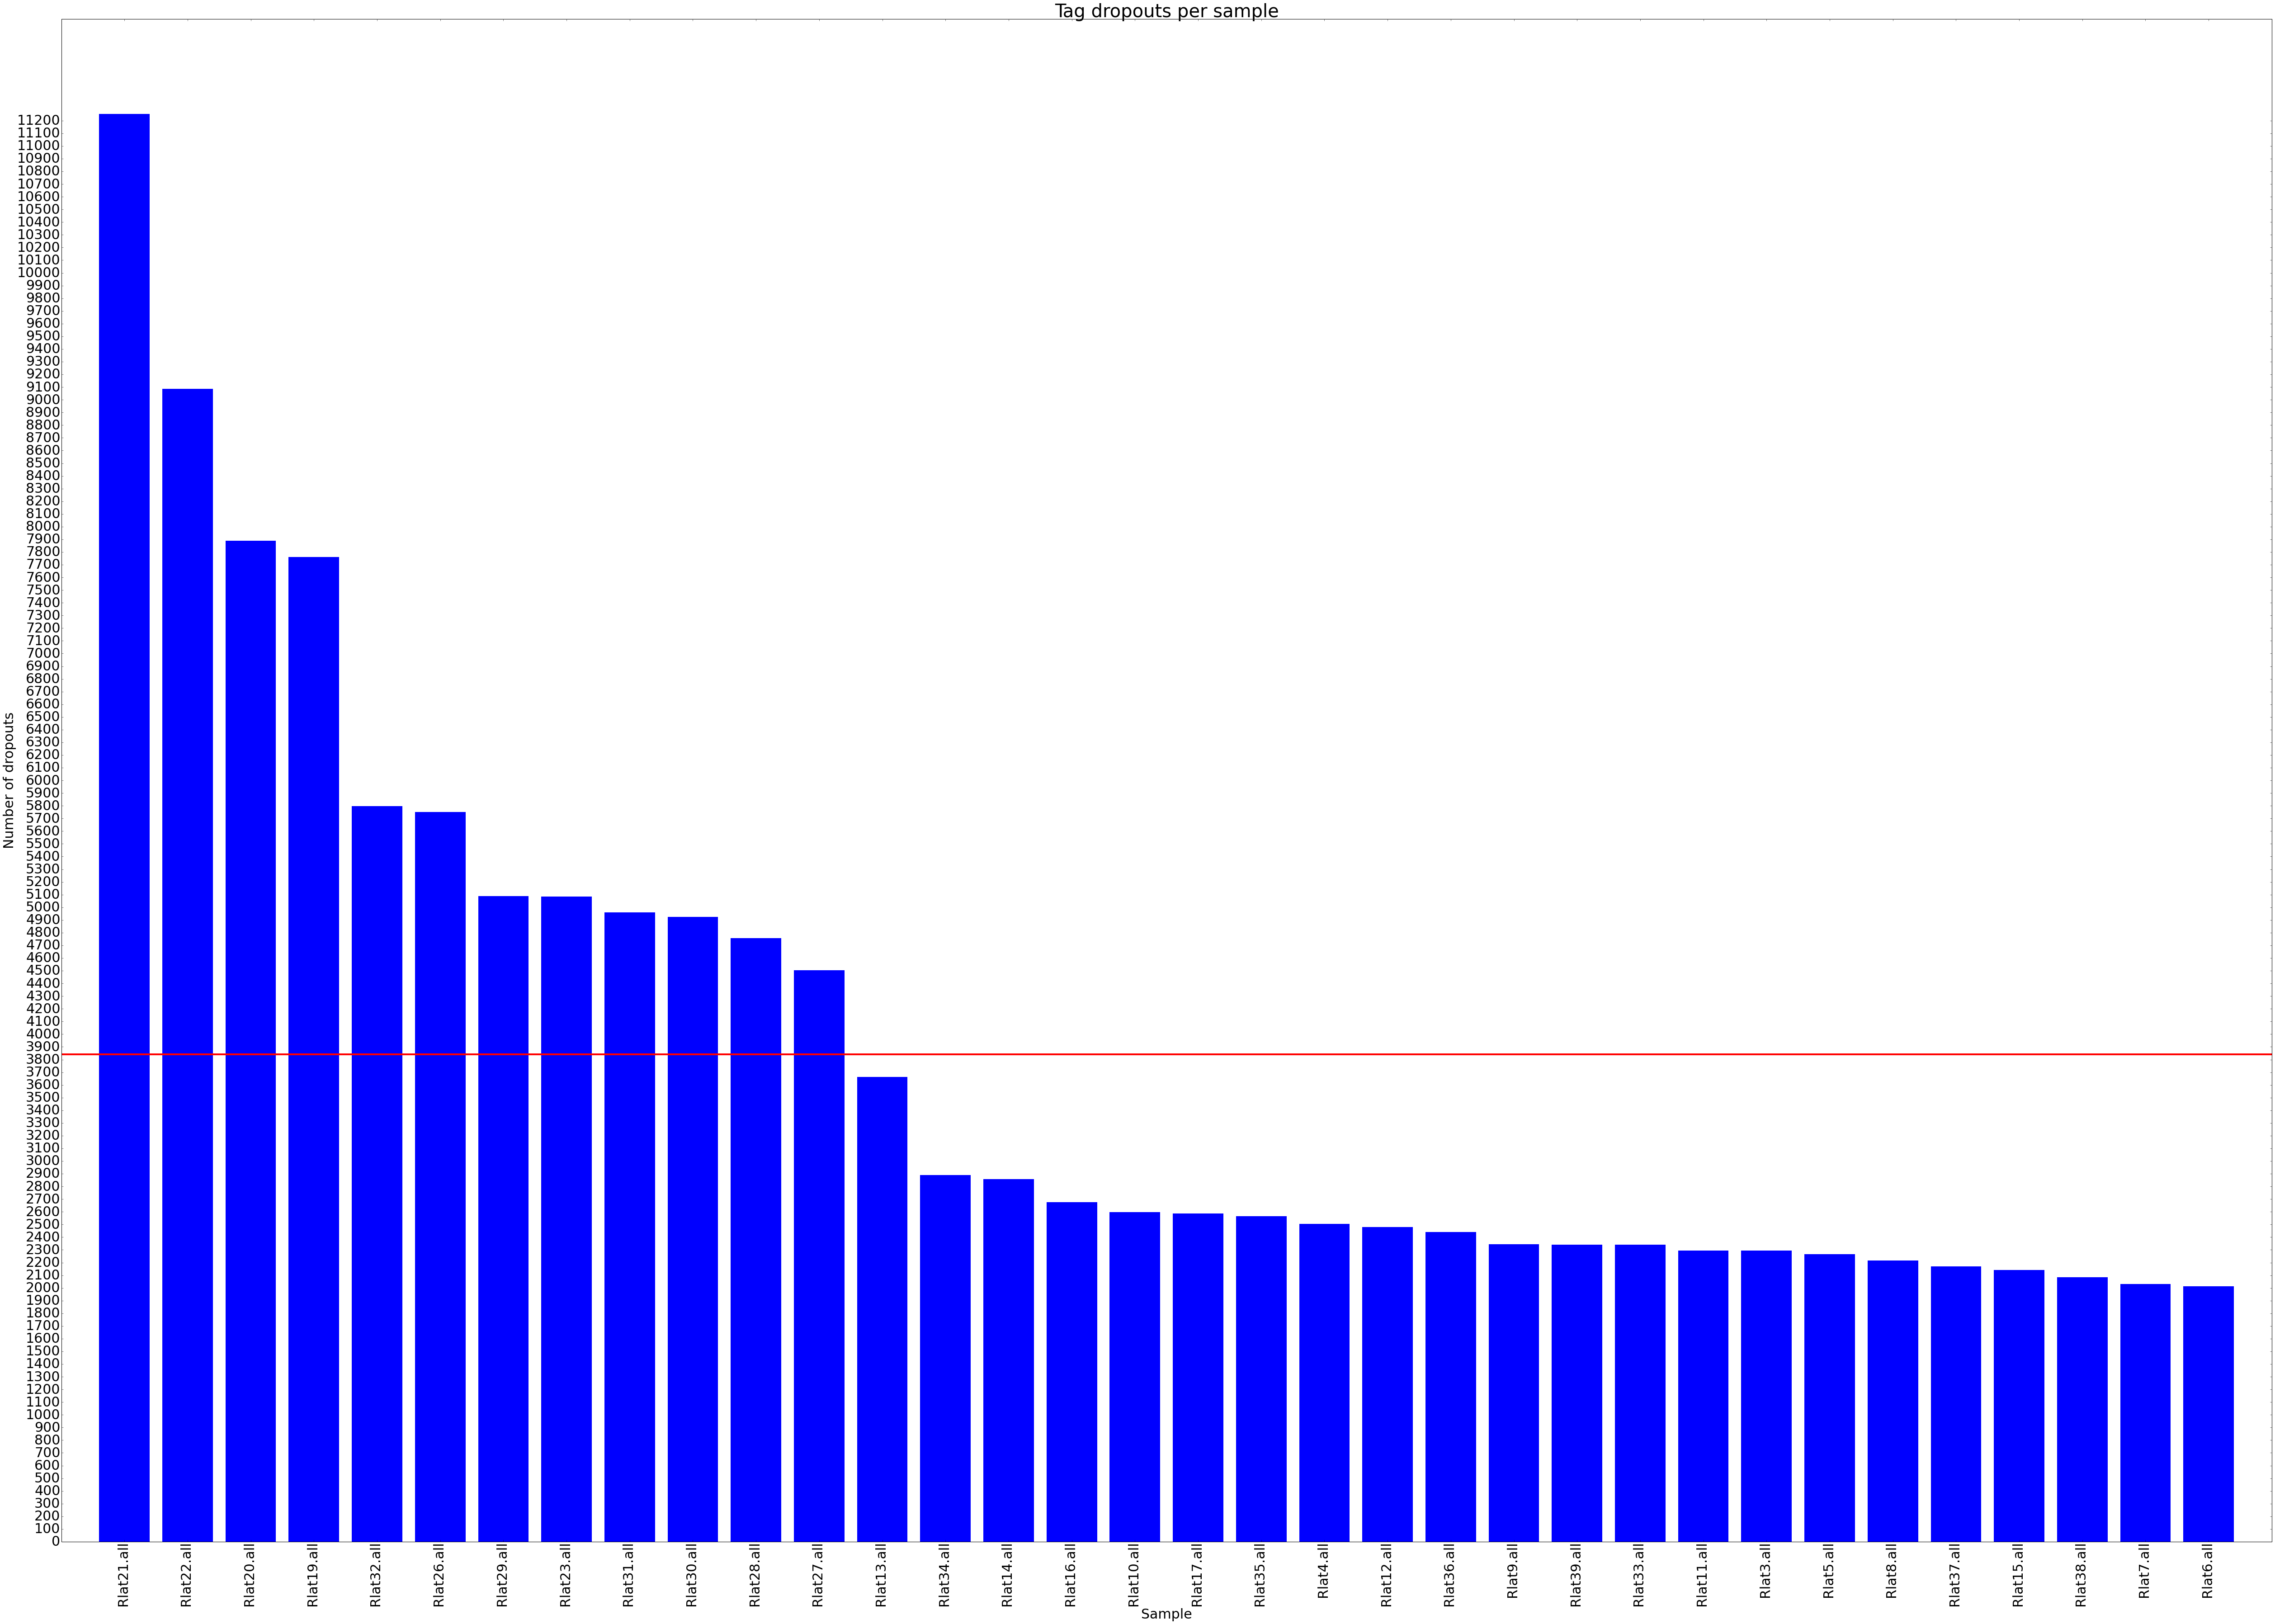

Outputs written to:
/home/djeffrie/Data/RADseq/Rlatastei/Populations_relaxed/Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Rlatastei/Populations_relaxed/Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Rlatastei/Populations_relaxed/Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Rlatastei/Populations_relaxed/Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Rlatastei/Populations_relaxed/blacklist.txt


In [3]:
wd = "/home/djeffrie/Data/RADseq/Rlatastei/Populations_relaxed"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

So there some bad quality samples here. I will remove the first 4 mentioned below, see how it looks and maybe remove a few more later if I find no sex linked markers

Samples removed:

Rlat21
Rlat22
Rlat20
Rlat19


Leaves 30 samples:
- 14 females
- 15 males
- 1 unknown (called as male - can swap if it looks wrong in PCA)

And now run the populations module using strict parameters

    populations -b1 -P ./ -M sex_info_edited_kept.txt -r 0.75 -p 2 --vcf -t 8 > Populations_strict_kept.log 2>&1 &





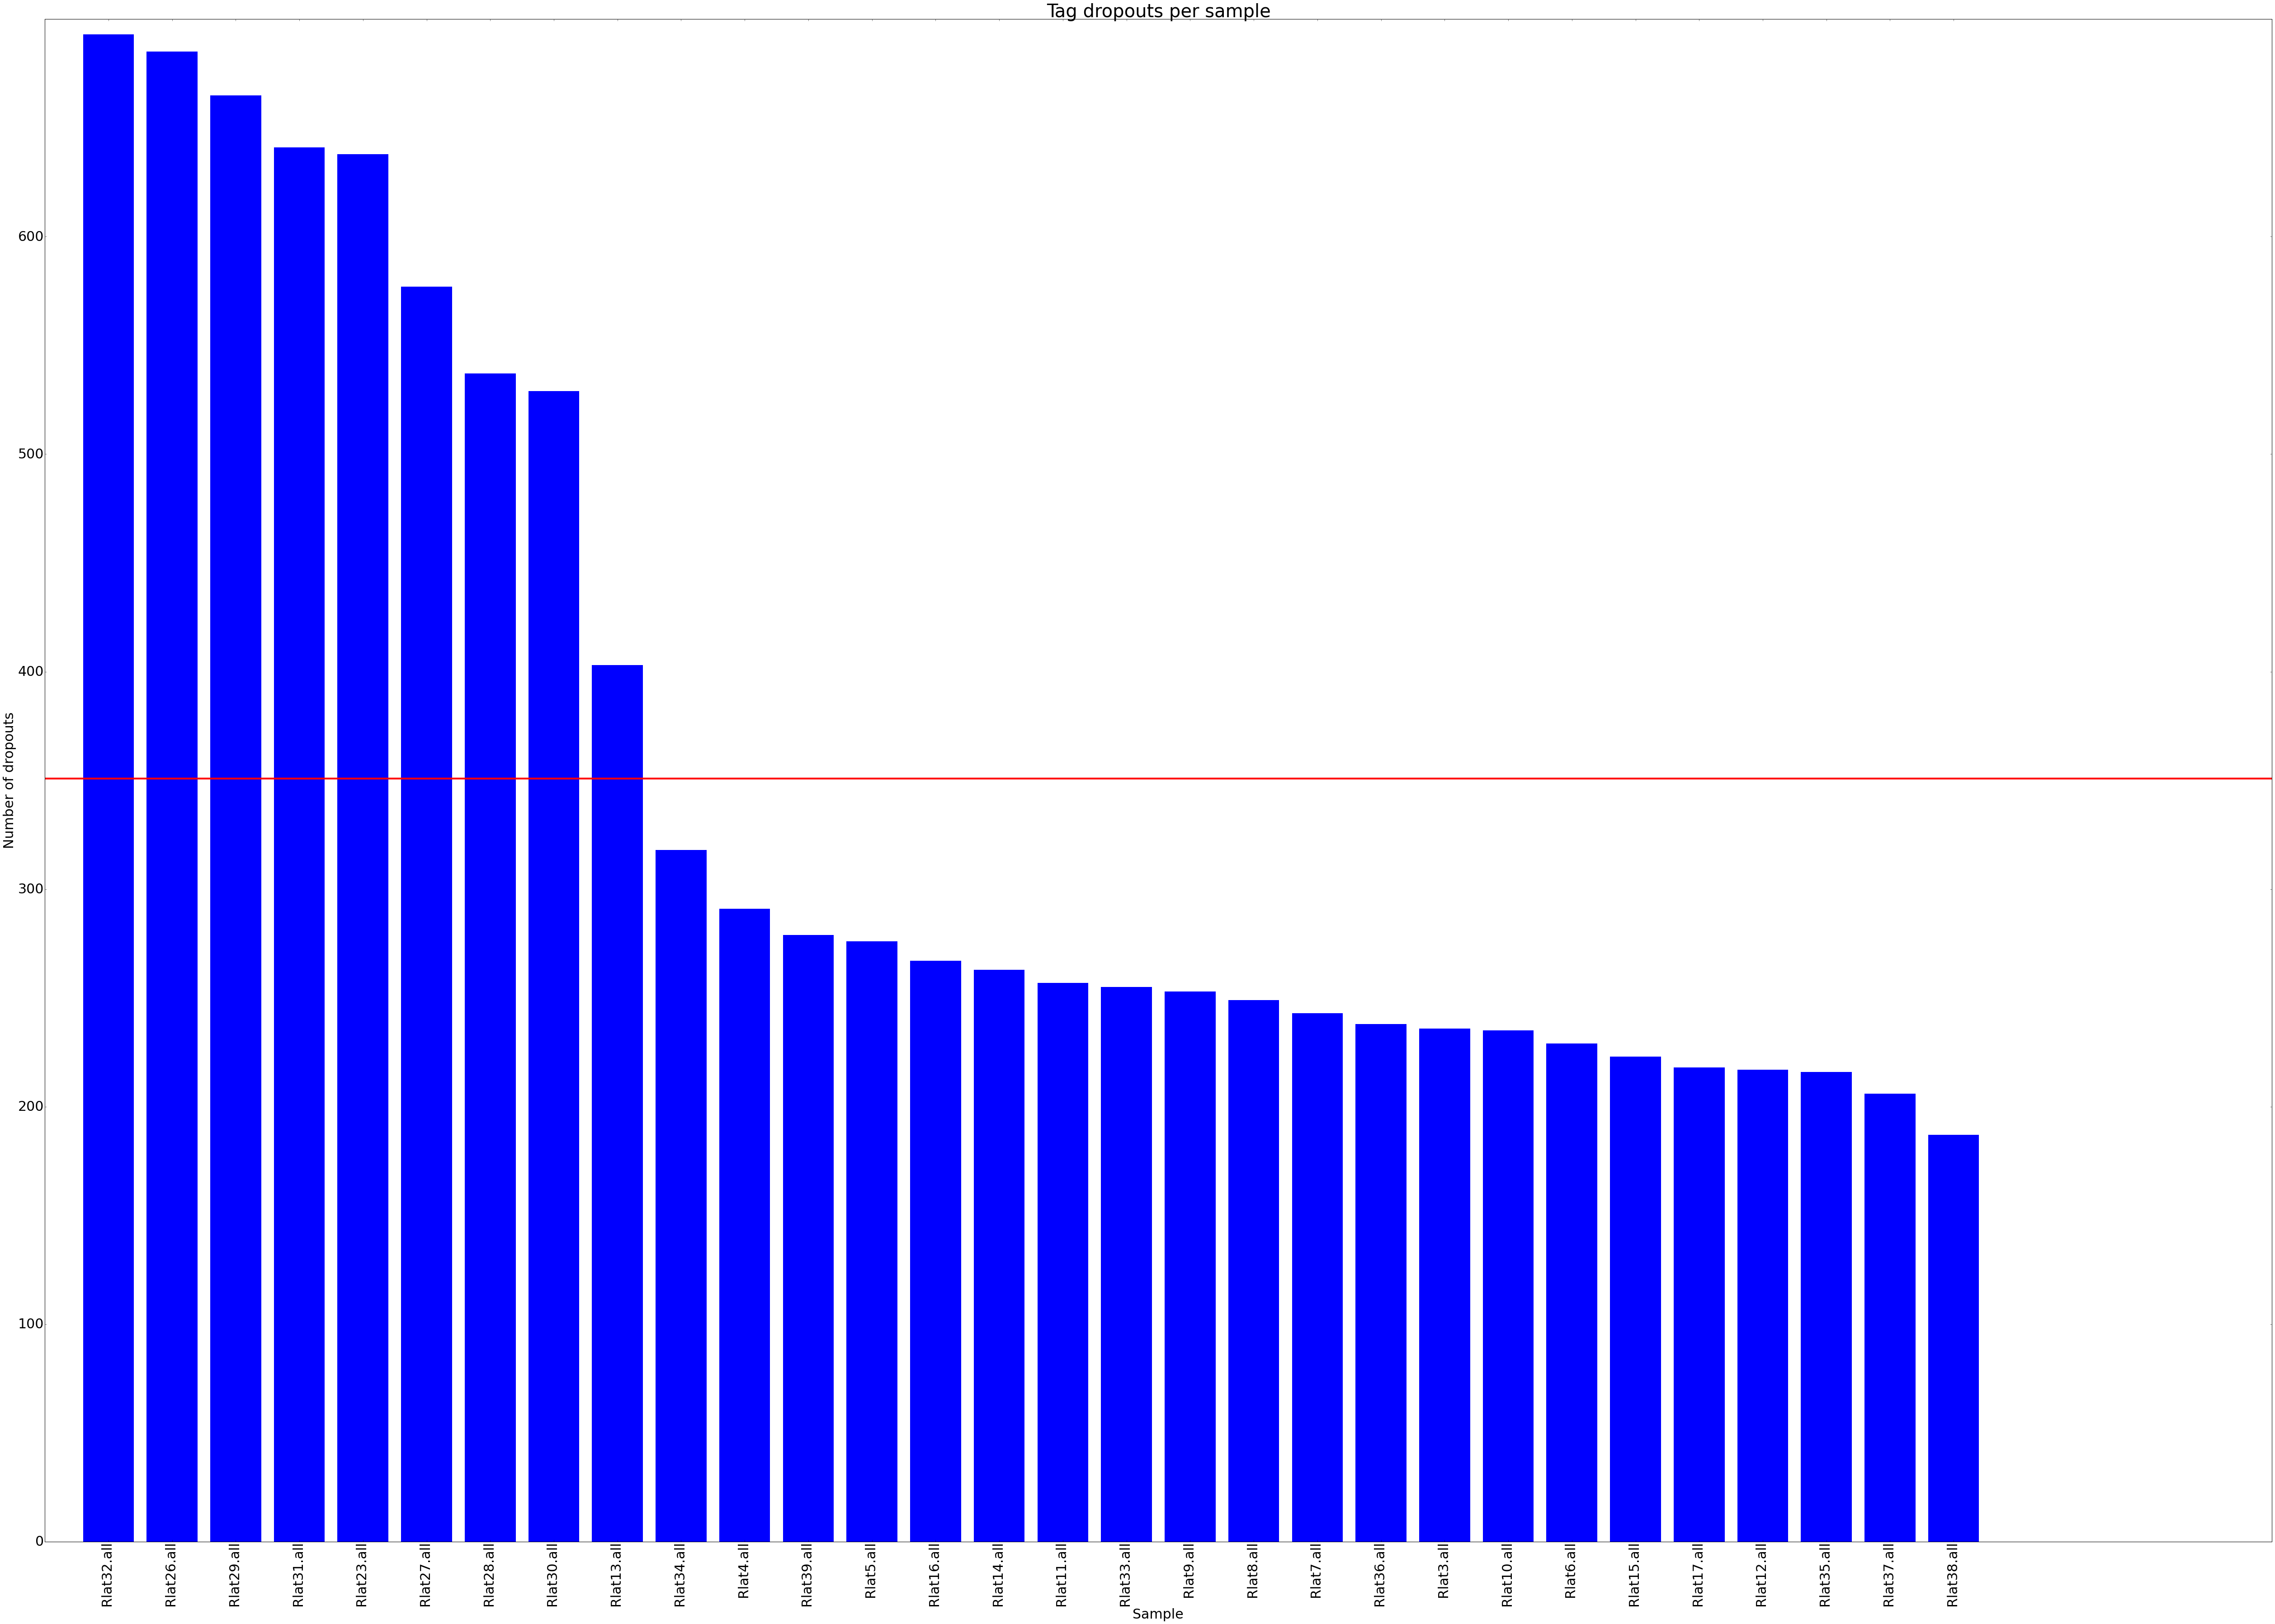

Outputs written to:
/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//blacklist.txt


In [4]:
wd = "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

This retained 33. And resulted in about 37,000 tags, but there are only about 3400 snps in these tags. So it looks like this species is pretty bottlenecked. Shouldn't effec the number of sex linked snps too much though. . .  

### Now run a PCA using all loci to look at the (mostly) neutral structure in the data

In [5]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//batch_1_altered_adegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//batch_1_altered_adegenet_plink-temporary.fam
written.
3458 variants loaded from .bim file.
30 people (0 males, 0 females, 30 ambigu

In [10]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("sex_info_edited_kept.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 




 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Saving 19.7 x 19.7 in image

  warnings.warn(x, RRuntimeWarning)


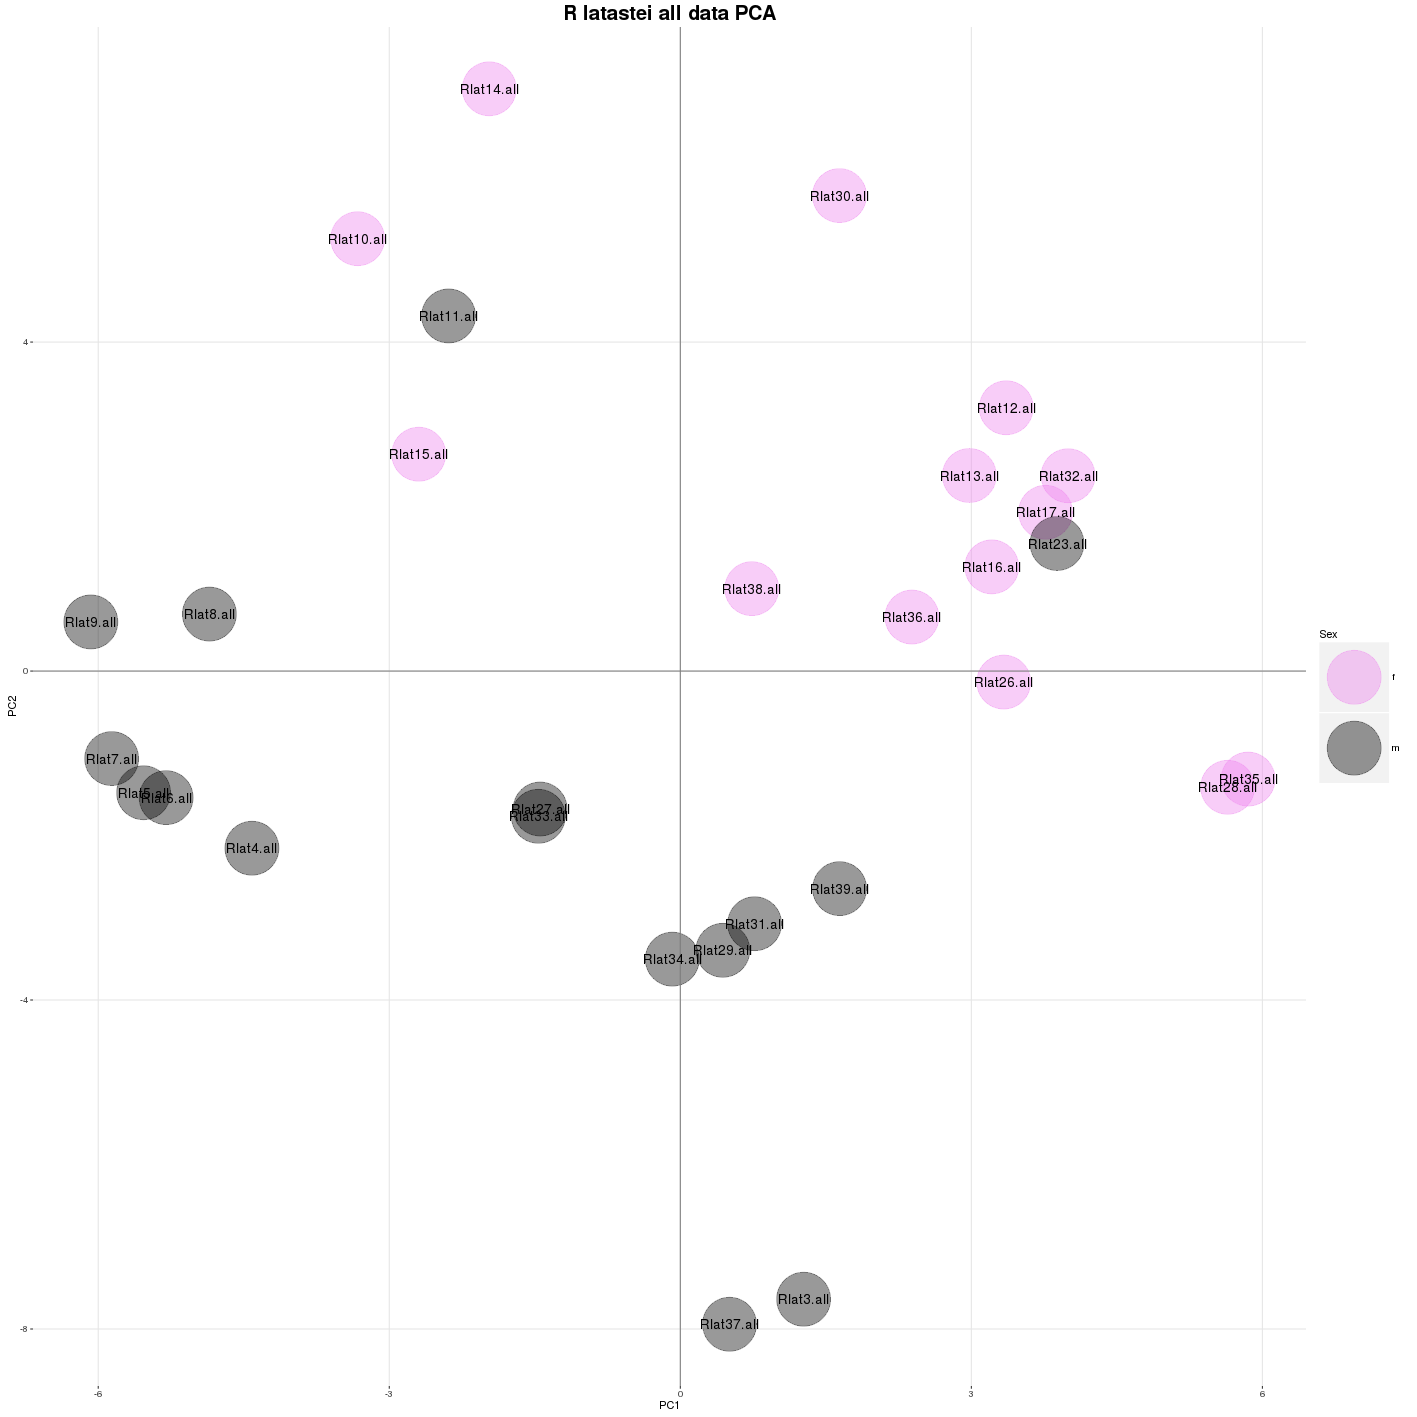

In [11]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R latastei all data PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

So this looks pretty good! There may even already be some male / female signal here.

### Now find sex linked markers using the 3 approaches in Brelsford & Lavanchy et al (2016)

In [4]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept/Sex_ID_info_edited_kept.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 3458
Number of samples = 30
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 3457
Number of putative X linked snps = 35
Number of putative X linked tags = 35
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0


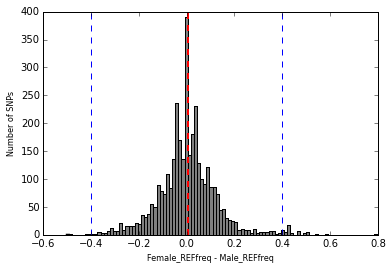


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 3458
Number of samples = 30
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 3457
Number of putative X linked snps = 38
Number of putative X linked tags = 38
Number of putative Z linked markers = 3
Number of putative Z linked tags = 3

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 14
Number of males: 16
Number of Putative Y linked tags: 45
Number of Putative W linked tags: 6

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept

 ## After merging tags accross methods ## 

Final number of XY tags = 86
Final number of ZW tags = 9


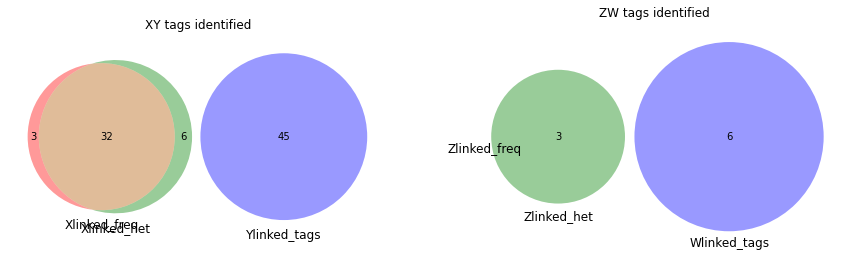

In [7]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

In [16]:
import vcf
from Bio import SeqIO


vcfpath = "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept/batch_1.vcf"
XY_tags = "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept/Putative_XYlinked_makers.fa"

XY_set = set(XYset)

SL_vcf = open("/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept/XY_linked_snps.vcf", 'w')

XYtags_parsed = SeqIO.parse(XY_tags, "fasta")
vcf_parsed = vcf.Reader(open(vcfpath, 'r'))

XY_ids = []
    
for line in open(vcfpath,'r').readlines():
    if line.startswith("#"):
        SL_vcf.write(line)
    else:
        if line.split()[2] in XY_set:
            SL_vcf.write(line)
SL_vcf.close()

In [17]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept/  ## just change this line

## All data 
sed 's/_/-/g' $wd/XY_linked_snps.vcf > $wd/XY_linked_snps_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//XY_linked_snps_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//XY_linked_snps_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//XY_linked_snps_altered_adegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//XY_linked_snps_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//XY_linked_snps_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept//XY_linked_snps_plink-temporary.fam
written.
31 variants loaded from .bim file.
30 people (0 males, 0 females, 30 ambiguous) loaded from .fam.
Ambiguous sex IDs writ

In [19]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept/") 

## Sex linked data
XYdata <- read.PLINK('XY_linked_snps_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("sex_info_edited_kept.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca2 <- glPca(XYdata, parallel = TRUE, n.cores = 2, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



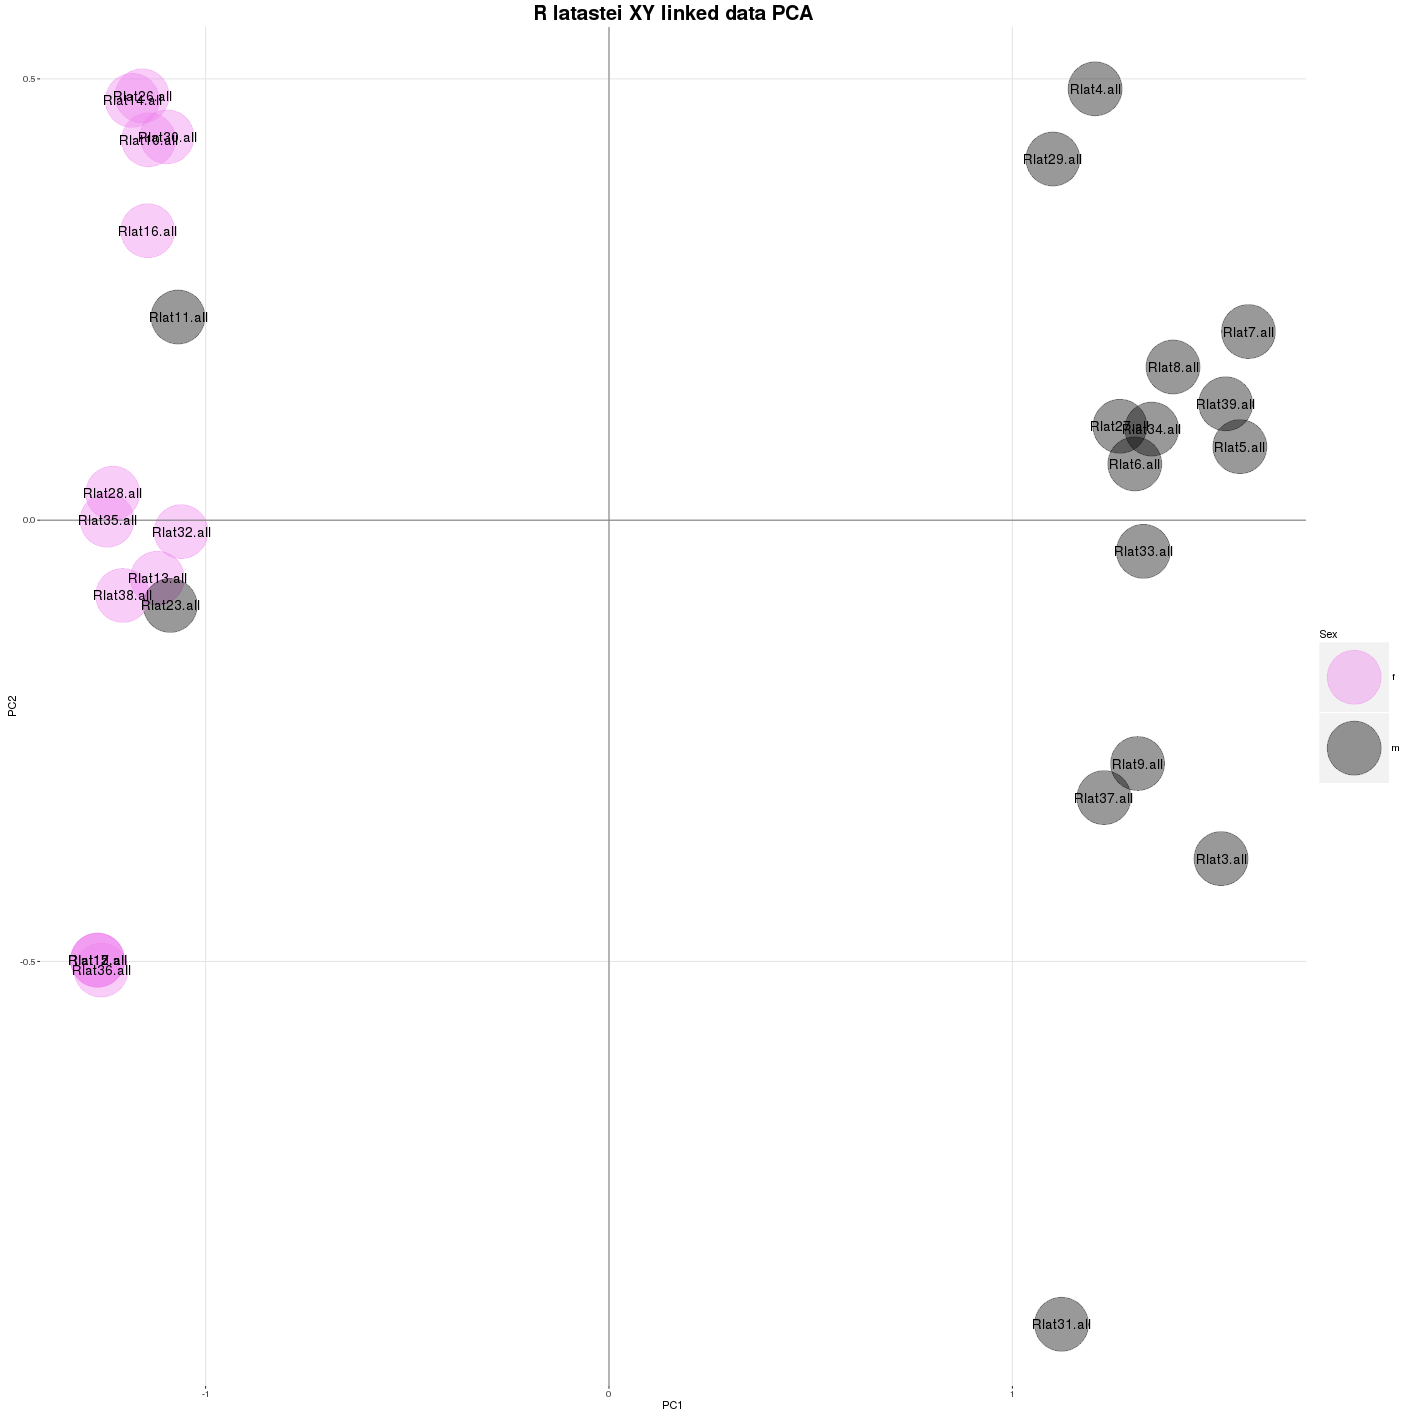

In [20]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R latastei XY linked data PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

Despite the really solid XY signal, there looks like there are actually 2 misassigned females. So I will remove these and run the sex linked marker finder again!

Removed:

- Rlat 11
- Rlat 23

Note that my guess of male for the Rlat8 sample looks correct.

Number of tags =  3213
Average tag coverage 20.1789715886 (+- 14.9362443182 )


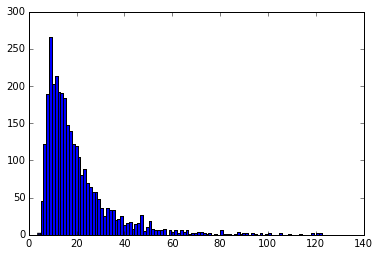

In [1]:
%matplotlib inline
import MISC_RAD_tools as MISC
wd = "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/"
final_vcf = "%s/batch_1.vcf" % wd
MISC.av_tag_cov(final_vcf, "%s/Av_tag_cov.out" % wd)
#MISC.sample_Avcov_from_vcf(final_vcf)

In [1]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/Sex_ID_info_edited_kept2.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 3213
Number of samples = 28
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 3212
Number of putative X linked snps = 28
Number of putative X linked tags = 28
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0


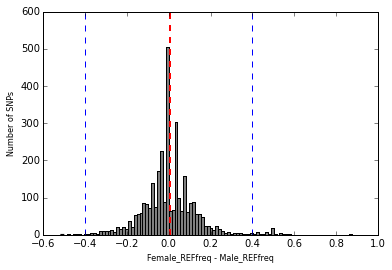


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 3213
Number of samples = 28
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 3212
Number of putative X linked snps = 29
Number of putative X linked tags = 29
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 14
Number of males: 14
Number of Putative Y linked tags: 52
Number of Putative W linked tags: 8

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2

 ## After merging tags accross methods ## 

Final number of XY tags = 81
Final number of ZW tags = 8


/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:52: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")
/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:56: UserWarning: Circle B has zero area
  warnings.warn("Circle B has zero area")


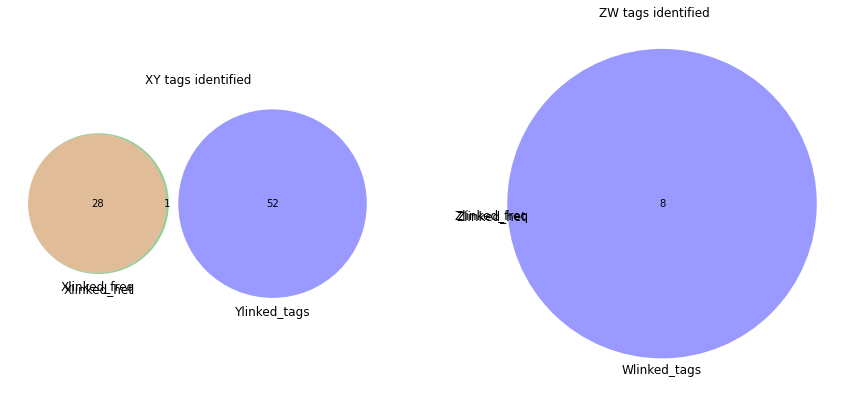

In [4]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

In [8]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/Sex_ID_info_edited_kept2.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 3213
Number of samples = 28
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 3212
Number of putative X linked snps = 42
Number of putative X linked tags = 42
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0


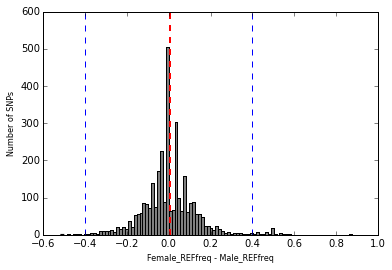


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 3213
Number of samples = 28
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 3212
Number of putative X linked snps = 44
Number of putative X linked tags = 44
Number of putative Z linked markers = 10
Number of putative Z linked tags = 10

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 14
Number of males: 14
Number of Putative Y linked tags: 52
Number of Putative W linked tags: 8

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2

 ## After merging tags accross methods ## 

Final number of XY tags = 103
Final number of ZW tags = 18


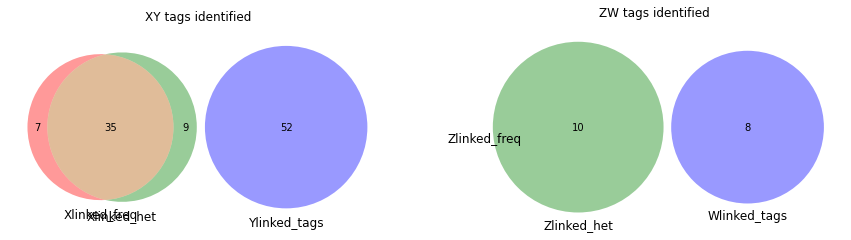

In [9]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

So I identified 4 more tags. Not much better really. But the overall result is pretty good! 

So how does the PCA look now . . . ?

In [7]:
vcf_path = "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/batch_1.vcf"

MISC.filter_vcf(vcf_path, XYset , "XY_linked_snps_freq_het.vcf")

In [8]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/  ## just change this line

## XY only data 
sed 's/_/-/g' $wd/XY_linked_snps_freq_het.vcf > $wd/XY_linked_snps_freq_het_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_freq_het_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/XY_linked_snps_freq_het_altered_adegenet

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2//XY_linked_snps_freq_het_altered_adegenet.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2//XY_linked_snps_freq_het_altered_adegenet
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2//XY_linked_snps_freq_het_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2//XY_linked_snps_freq_het_altered_adegenet-temporary.bed
+
/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2//XY_linked_snps_freq_het_altered_adegenet-temporary.bim
+
/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2//XY_linked_snps_freq_het_altered_adegenet-temporary.fam
written.
29 va

In [10]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/") 

## All SNPs (about 80,000)
XYdata <- read.PLINK('XY_linked_snps_freq_het_altered_adegenet.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info_edited_kept2.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca2 <- glPca(XYdata, parallel = TRUE, n.cores = 2, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Saving 19.7 x 19.7 in image

  warnings.warn(x, RRuntimeWarning)


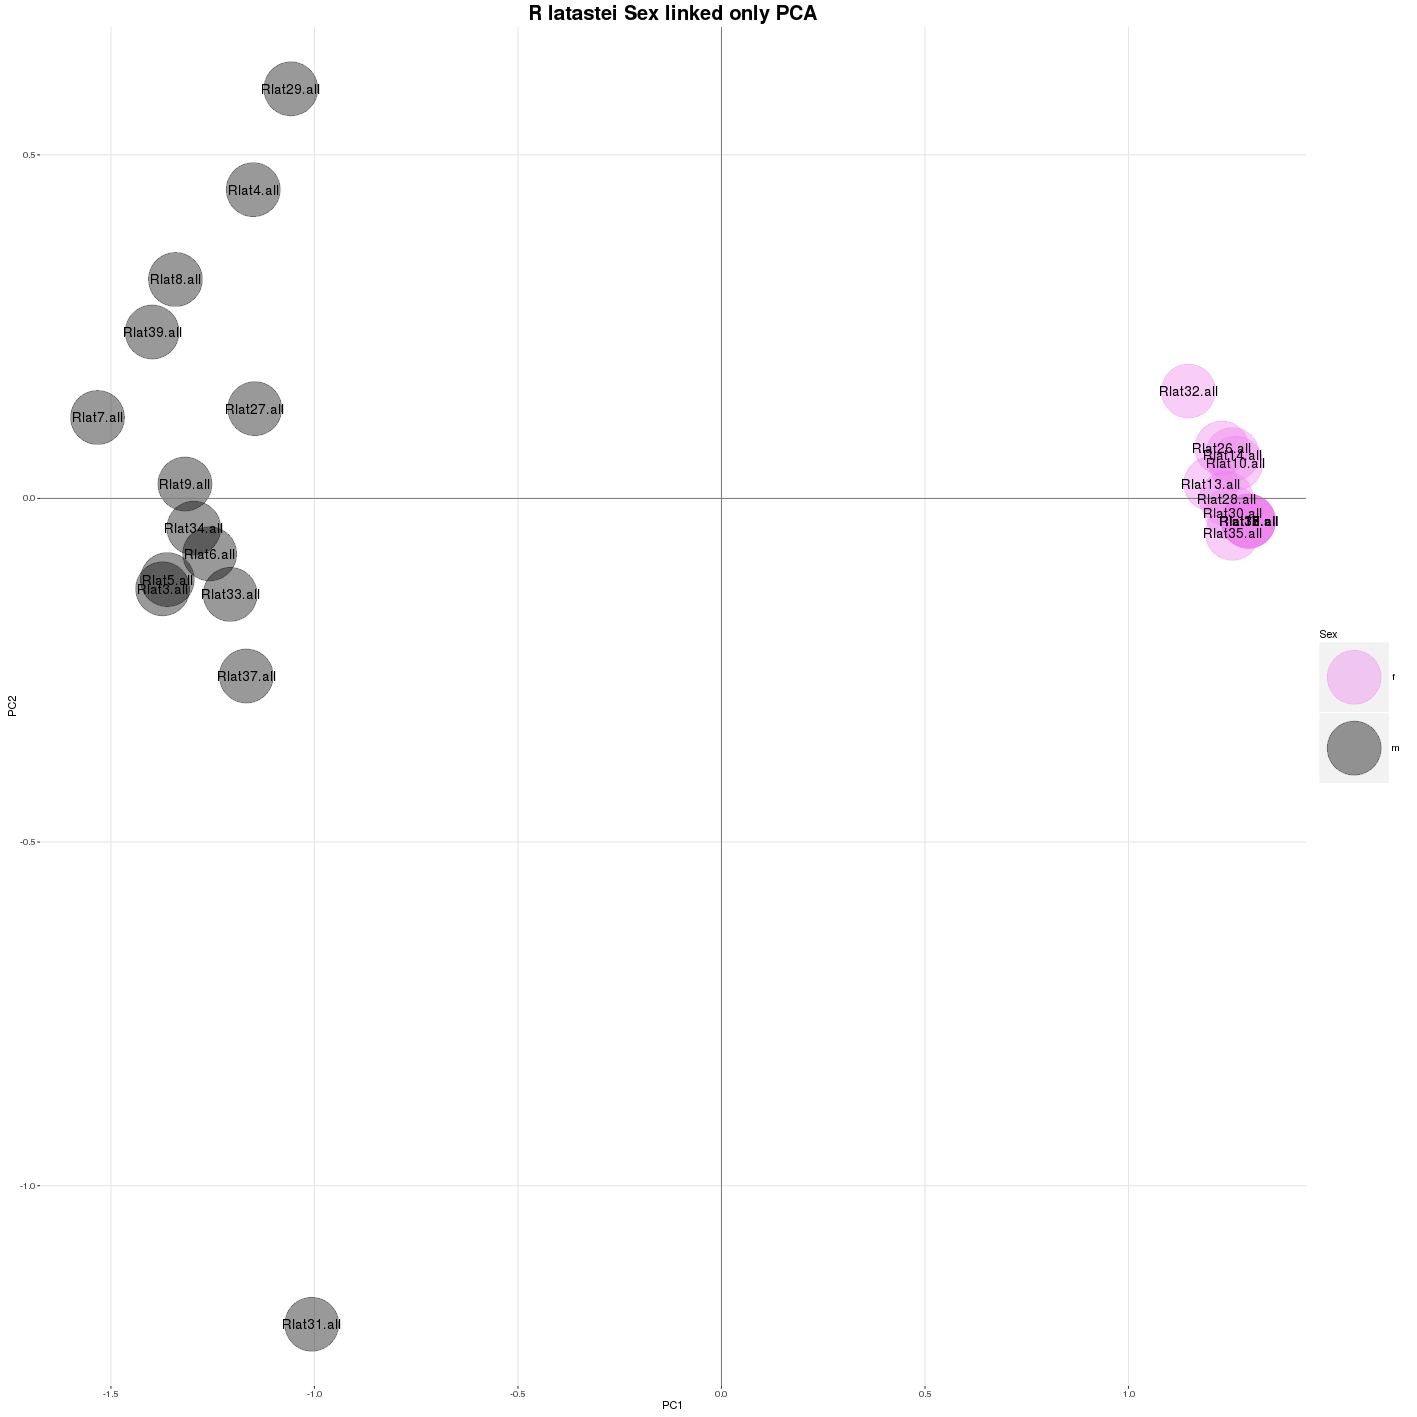

In [11]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R latastei Sex linked only PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

## Summary

Looks like a pertty bottlenecked species. But I think this makes it easier to find sex linked markers (less noise coming from autosoomes). So 76 XY tags and very few ZWs.

## Manual mapping

In [13]:
from Bio.Blast.Applications import NcbiblastnCommandline
import MISC_RAD_tools as MISC
import shutil

Rtemp_fasta = "/home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2.fa"
Rtemp_db = "/home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2-blastn-db"

Nano_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta"
Nanorana_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_blast_db"

Xen_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xenoupus_blastdb"
Xen_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa"


best_hit_crit = 1e-3
Eval_threshold = 1e-15
Window = 10000

wd = "/home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/R_latastei/"
prefix = "R_lat"

### Tags to Rtemp

print "\n##  Mapping tags to R. temporaria  ##\n"

tags ="%s/%s" % (wd, "R_latastei.fa")
tags_to_Rtemp_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "tags_Rtemp_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=tags, db=Rtemp_db, outfmt=5, out=tags_to_Rtemp_blastnouts)
stdout, stderr = blastn_cline()

Rtemp_records = MISC.BlastParseExtra(tags_to_Rtemp_blastnouts, Rtemp_fasta , best_hit_crit, Eval_threshold,Window)

Rtemp_blast_chunks = "%s/%s" % (wd,  "%s_%s" % (prefix, "Rtemp_8k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_10000_chunks.fa"), Rtemp_blast_chunks)


### Rtemp chunks to Nanorana

print "\n##  Mapping Rtemp chunks Nanorana  ##\n"

tags_Rtemp_Nano_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "Rtemp_Nano_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=Rtemp_blast_chunks, db=Nanorana_db, outfmt=5, out=tags_Rtemp_Nano_blastnouts)
stdout, stderr = blastn_cline()

Nano_records = MISC.BlastParseExtra(tags_Rtemp_Nano_blastnouts, Nano_fasta , best_hit_crit, Eval_threshold,Window)

Rtemp_Nano_blast_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "Rtemp_Nano_10k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_10000_chunks.fa"), Rtemp_Nano_blast_chunks)



### Nanorana chunks to Xenopus

print "\n##  Mapping Nanorana chunks Xenopus  ##\n"

tags_Rtemp_Nano_Xen_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "Rtemp_Nano_Xen_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=Rtemp_Nano_blast_chunks, db=Xen_db, outfmt=5, out=tags_Rtemp_Nano_Xen_blastnouts)
stdout, stderr = blastn_cline()

Xen_records = MISC.BlastParseExtra(tags_Rtemp_Nano_Xen_blastnouts, Xen_fasta , best_hit_crit, Eval_threshold,Window)

Xen_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "Rtemp_Nano_Xen_10kb_chunks.fa"))
                                      
shutil.move("%s/%s" % (wd,"blast_10000_chunks.fa"), Xen_chunks)



### Get the Xenopus summary

print "\n##  Final Xenopus hits  ##\n"

from collections import Counter 
Xen_hits = []
for i in Xen_records:
    Xen_hits.append(Xen_records[i]["Ref_hit_id"])
    print i, Xen_records[i]["Ref_hit_id"]


##  Mapping tags to R. temporaria  ##

Number of multi-alingments kept: 15
Number of unique alingments kept: 7
Getting subject scaffold segments from /home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2.fa . . . 
22 sequence scaffold segments are in /home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/R_latastei//blast_10000_chunks.fa

##  Mapping Rtemp chunks Nanorana  ##

Number of multi-alingments kept: 14
Number of unique alingments kept: 1
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta . . . 
14 sequence scaffold segments are in /home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/R_latastei//blast_10000_chunks.fa

##  Mapping Nanorana chunks Xenopus  ##

Number of multi-alingments kept: 3
Number of unique alingments kept: 2
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mappin

In [10]:
def Null_mapper(sex_linked_markers_path, catalog_path, Genome_fasta, Genome_db, Eval = 1e-20, N_its = 10, Species = "", Threads = 1):
    
    """
    This function takes a set of sex linked (SL) markers and maps them against the ordered Xenopus genome. It also retrieves <N_its> * random subsets of markers
    from the Stacks RADseq catalog of the same size as the set of SL markers and maps them to the genome. This essentially gives a null distribution for
    the number of hits to expect from randomly selected markers in the genome. Thus, if the number of SL markers which map to a given chromosome is
    significantly higher than this null distrubution, this is good support for these markers indeed being sex linked.    
    
    Note it is not a general function, it is a function which require 1) 10 chromosomes in the reference genome ordering, 2) the 
    right format of scaffold name. 
    
    sex_linked_markers_path - Path to a fasta of sequences of interest
    catalog_path            - Path to the stacks catalog file
    Genome_fasta            - Path to the fasta for the genome
    Genome_db               - Path to the blastn index of the genome
    N_its                   - Number of random mappings to perform
    Species                 - Name of the species
    Threads                 - Number of threads to use in the mapping step
    
    
    """
    
    
    import gzip
    import random
    import os
    import numpy as np
    from collections import Counter 
    from Bio.Blast.Applications import NcbiblastnCommandline
    from matplotlib import pyplot as plt
    import gzip
    import shutil
    import MISC_RAD_tools as MISC

    
    ## First, get the IDs of the sex linked tags.

    sex_linked_markers = open(sex_linked_markers_path, 'r').readlines()

    SL_tag_IDs = []

    for line in sex_linked_markers:
        if ">" in line:
            SL_tag_ID = line.split("_")[2]
            if SL_tag_ID not in SL_tag_IDs:
                SL_tag_IDs.append(SL_tag_ID)

    print "Got %s sex-linked tag IDs" % (len(set(SL_tag_IDs)))
    
    
    ## Then get the IDs of the tags in the catalog

    catalog = gzip.open(catalog_path, 'r').readlines()[1:]

    cat_tag_IDs = []

    for line in catalog:
        cat_tag_ID = line.split()[2]
        cat_tag_IDs.append(cat_tag_ID)

    print "\nGot %s catalog tag IDs" % (len(cat_tag_IDs))
    
    
    ## Now remove the sex linked markers from the catalog tags
    counter = 0
    for i in SL_tag_IDs:
        if i in cat_tag_IDs:
            cat_tag_IDs.remove(i)
            counter += 1

    print "\nRemoved %s tags from catalog tags" % counter
    
    ## Now get "N" random samples of tags of the same size as the number of sex linked markers.


    
    random_samples = {}
    paths = {}
    file_strings = {}
    
    N = N_its
    
    print "\nMaking %s fasta files" % N

        
    ## Ok, so now I need to get these markers from the catalog and make fasta's for the mapping. Need to do this efficiently
    

    catalog_lines = []

    for tag in catalog:
        tagID =  tag.split()[2]
        seq = tag.split()[8]
        cat_line = ">%s\n%s\n" % (tagID, seq)
        catalog_lines.append(cat_line)

    wd = "%s/Random_tags/" % sex_linked_markers_path.rpartition("/")[0]

    if not os.path.exists(wd):
        os.mkdir(wd) 

    for i in range(N_its):
        random_sample = random.sample(catalog_lines, len(SL_tag_IDs))    
        
        with open("%s/random_sample_%s.fasta" % (wd, i), 'w') as fh:
            for line in random_sample:
                fh.write(line)
    
    print "\nDoing %s Random mapping iterations" % N

    
    ## Now I need to do the mapping and catch the outputs

    ## First get fasta paths

    fasta_paths = []
    N_fastas = 0
    for root, dirs, files in os.walk(wd):
        for fasta in files:
            if fasta.endswith("fasta"):
                if N_fastas <= N:
                    fasta_paths.append("%s/%s" % (root, fasta))
                    N_fastas += 1
                    
    ## Set mapping filtering criteria (can make these options later if needed)

    best_hit_crit = 1e-5
    Eval_threshold = Eval
    Window = 2000

    ## Set up dictionary to catch blast results

    blastn_outs_dict = {}  ## fasta paths can be the dictionary keys

    counter = 1
    for fasta in sorted(fasta_paths):

        print "\nBlasting %s (%s of %s)\n" % (fasta, counter, N)

        blast_out_path = "%s_blastn.xml" % fasta.rpartition(".")[0]

        blastn_cline = NcbiblastnCommandline(query=fasta, db=Genome_db, outfmt=5, out=blast_out_path, num_threads = Threads)
        stdout, stderr = blastn_cline()

        blastn_outs_dict[fasta] = MISC.BlastParseExtra(blast_out_path, Genome_fasta , best_hit_crit, Eval_threshold,Window)
        
        counter += 1

        
        ## gzip the fasta
        with open(fasta, 'rb') as f_in:
            with gzip.open("%s.gz" % fasta, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        os.remove(fasta)
        
        ## gzip the xml output
        with open(blast_out_path, 'rb') as f_in:
            with gzip.open("%s.gz" % blast_out_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        os.remove(blast_out_path)
                
                
        
    ## And now map the real sex linked tags

    print "\nBlasting real sex linked markers\n"
    
    real_SLM_blast_out_path = "%s_REAL_SL_TAG_blastn_outs.xml" % sex_linked_markers_path.rpartition(".")[0]

    blastn_cline = NcbiblastnCommandline(query=sex_linked_markers_path, db=Genome_db, outfmt=5, out=real_SLM_blast_out_path, num_threads = Threads)
    stdout, stderr = blastn_cline()

    Real_SL_tag_blastouts =  MISC.BlastParseExtra(real_SLM_blast_out_path, Genome_fasta , best_hit_crit, Eval_threshold,Window)

    print "\nReal sex linked marker blastn outputs are here: %s" % real_SLM_blast_out_path

    
    ## Now count the number of mappings per chromosome across the randomised marker samples
    
    All_mapping_counts = {}

    All_mapping_counts["Chr01"] = []
    All_mapping_counts["Chr02"] = []
    All_mapping_counts["Chr03"] = []
    All_mapping_counts["Chr04"] = []
    All_mapping_counts["Chr05"] = []
    All_mapping_counts["Chr06"] = []
    All_mapping_counts["Chr07"] = []
    All_mapping_counts["Chr08"] = []
    All_mapping_counts["Chr09"] = []
    All_mapping_counts["Chr10"] = []

    for i in blastn_outs_dict: ## for each mapping run

        ### Get the mapping counts per chromosome

        Xen_chroms = {}

        Xen_chroms["Chr01"] = 0
        Xen_chroms["Chr02"] = 0
        Xen_chroms["Chr03"] = 0
        Xen_chroms["Chr04"] = 0
        Xen_chroms["Chr05"] = 0
        Xen_chroms["Chr06"] = 0
        Xen_chroms["Chr07"] = 0
        Xen_chroms["Chr08"] = 0
        Xen_chroms["Chr09"] = 0
        Xen_chroms["Chr10"] = 0


        
        hits = []
        hit_Xen_scaff = []

        for record in blastn_outs_dict[i]:
            hits.append(blastn_outs_dict[i][record]["Ref_hit_id"])
            hit_Xen_scaff.append(blastn_outs_dict[i][record]["Ref_hit_id"].split("_")[1])

        counts = Counter(hit_Xen_scaff)

        for chrom in Xen_chroms:
            if chrom in counts:
                Xen_chroms[chrom] = counts[chrom]

        for chrom in Xen_chroms:
            All_mapping_counts[chrom].append(Xen_chroms[chrom])

    ## And do the same for the real sex linked markers

    hits = []
    hit_Xen_scaff = []

    for i in Real_SL_tag_blastouts:
        hits.append(Real_SL_tag_blastouts[i]["Ref_hit_id"])
        hit_Xen_scaff.append(Real_SL_tag_blastouts[i]["Ref_hit_id"].split("_")[1])

    print "\nNumber of hits =", len(hits) 

    counts = Counter(hit_Xen_scaff)

    Real_SL_tagXen_chroms = {}

    Real_SL_tagXen_chroms["Chr01"] = 0
    Real_SL_tagXen_chroms["Chr02"] = 0
    Real_SL_tagXen_chroms["Chr03"] = 0
    Real_SL_tagXen_chroms["Chr04"] = 0
    Real_SL_tagXen_chroms["Chr05"] = 0
    Real_SL_tagXen_chroms["Chr06"] = 0
    Real_SL_tagXen_chroms["Chr07"] = 0
    Real_SL_tagXen_chroms["Chr08"] = 0
    Real_SL_tagXen_chroms["Chr09"] = 0
    Real_SL_tagXen_chroms["Chr10"] = 0


    for i in Real_SL_tagXen_chroms:
        if i in counts:
            Real_SL_tagXen_chroms[i] = counts[i]
    
    
    # And now then I just need to plot this as box plots

    fig = plt.figure(figsize=(20,10), frameon = False, edgecolor = 'none')
    ax = plt.subplot(111)
    pos = 1
    col = "white"
    
    
    max_y = max([max(i) for i in All_mapping_counts.values()] + Real_SL_tagXen_chroms.values()) + 3
    
    for i in sorted(All_mapping_counts.keys()):

        if col == "grey":
            col = "white"
        elif col == "white":
            col = "grey"
        
        ax.bar(left = pos-0.5, width = 1, height= max_y, color= col, edgecolor = col, bottom = 0, alpha = 0.2, zorder = 1)
        vio = ax.violinplot(All_mapping_counts[i], positions=[pos], showmeans = True, showextrema = False )
        
        for pc in vio['bodies']:
            pc.set_facecolor('khaki')
            pc.set_edgecolor('black')
            pc.set_zorder(2)    
            pc.set_alpha(1)
        
        ax.scatter(pos, Real_SL_tagXen_chroms[i], s = 60, zorder = 3, c = "royalblue")
        
        if Real_SL_tagXen_chroms[i] > np.percentile(All_mapping_counts[i], 99):
            ax.plot(pos-0.05, max([max(i) for i in All_mapping_counts.values()] + Real_SL_tagXen_chroms.values()) + 2, "*r", zorder = 3)
            ax.plot(pos+0.05, max([max(i) for i in All_mapping_counts.values()] + Real_SL_tagXen_chroms.values()) + 2, "*r", zorder = 3)
        elif Real_SL_tagXen_chroms[i] > np.percentile(All_mapping_counts[i], 95):
            ax.plot(pos, max([max(i) for i in All_mapping_counts.values()] + Real_SL_tagXen_chroms.values()) + 2, "*r", zorder = 3)
        
        pos += 1

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Only show ticks on the left spines
    ax.yaxis.set_ticks_position('left')

    ax.set_xlim(0, 11)
    ax.set_ylim(-1, max([max(i) for i in All_mapping_counts.values()] + Real_SL_tagXen_chroms.values()) + 3)
    ax.set_xticks(range(1,11))
    ax.set_xticklabels(sorted(All_mapping_counts.keys()))
    ax.set_xlabel("Xenopus chromosome", labelpad=20)
    ax.set_ylabel("Number of mapped markers",labelpad=20)
    ax.get_xaxis().set_tick_params(which='both', direction='out', pad = 15, bottom = 'off', top = 'off')
    plt.title(Species)

    plt.savefig("%s/Per_chromosome_mappings.svg" %  sex_linked_markers_path.rpartition("/")[0])
    
    plt.show()
    
    print "\nAll done, figure saved as svg here: %s/Per_chromosome_mappings_test.svg" %  sex_linked_markers_path.rpartition("/")[0]
    
    return Real_SL_tagXen_chroms, All_mapping_counts

Got 94 sex-linked tag IDs

Got 252793 catalog tag IDs

Removed 94 tags from catalog tags

Making 10 fasta files

Doing 10 Random mapping iterations

Blasting /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/Random_tags//random_sample_0.fasta (1 of 10)

Number of multi-alingments kept: 9
Number of unique alingments kept: 5

Blasting /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/Random_tags//random_sample_1.fasta (2 of 10)

Number of multi-alingments kept: 6
Number of unique alingments kept: 5

Blasting /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/Random_tags//random_sample_2.fasta (3 of 10)

Number of multi-alingments kept: 6
Number of unique alingments kept: 12

Blasting /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/Random_tags//random_sample_3.fasta (4 of 10)

Number of multi-alingments kept: 4
Number of unique alingments kept: 12

Blasting /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/Random_tags//random_sa

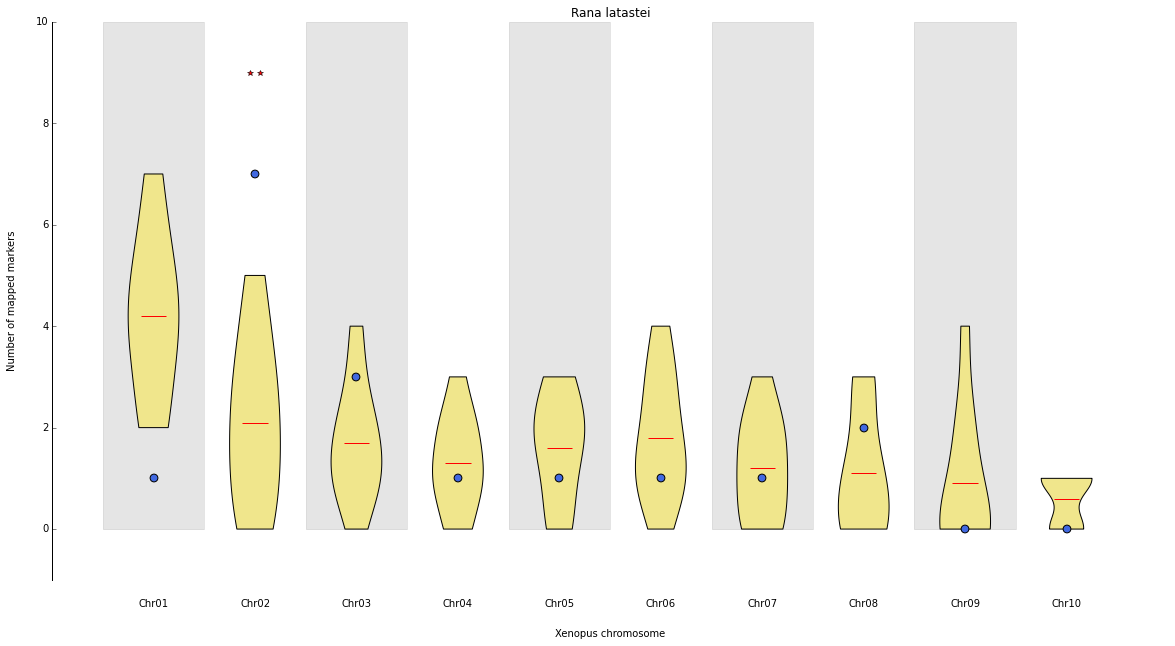


All done, figure saved as svg here: /home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/Per_chromosome_mappings_test.svg


In [14]:
myGenome_fasta = "/home/djeffrie/Data/RADseq/R_temp_fams/Genome_mapping/Final_map_files/Final_ordered_Rtemp_scaffolds/Rtemp_Linkage_map_ordered_scaffolds_XenIDs.fasta"
myGenome_db = "/home/djeffrie/Data/RADseq/R_temp_fams/Genome_mapping/Final_map_files/Final_ordered_Rtemp_scaffolds/Rtemp_Linkage_map_ordered_scaffolds_XenIDs_blastn_db"
mycatalog_path = "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/batch_1.catalog.tags.tsv.gz"
mysex_linked_markers_path = "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/Putative_XYlinked_makers.fa"
mySpecies = "Rana latastei"

SL_mappings, Null_mappings = Null_mapper(mysex_linked_markers_path, mycatalog_path, myGenome_fasta, myGenome_db, N_its=10, Eval=1e-15, Species= mySpecies, Threads=7)